I computed realizations of multiple HODs for a few statistics in the darksky boxes. This notebook is gonna combine them into a jackknife covmat. It'll also add some estimate of the shape noise contribution. 

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.colors as colors

In [2]:
import numpy as np
from glob import glob
from os import path

In [3]:
output_dir = '/home/users/swmclau2/Git/pearce/bin/covmat/ds14_covmat_v2/'

In [4]:
outputs = sorted(glob(path.join(output_dir, 'wp_ds_cic_darksky_obs_???.npy')))
print len(outputs)

510


In [90]:
N = len(outputs) # Should be 512, but a few may not have finished. Should make sure that those get reestarted, but likely not super important
all_outputs = np.zeros((N, 5,  2*18 + 15)) # num bins and num HODs 

In [91]:
for i,output_file in enumerate(outputs):
    output = np.load(output_file)
    all_outputs[i] = output#.mean(axis = 0)

In [92]:
all_outputs.shape

(510, 5, 51)

In [93]:
rp_bins = np.logspace(-1.0, 1.6, 19)
cic_bins = np.round(np.r_[np.linspace(1, 9, 8), np.round(np.logspace(1,2, 7))] )

In [94]:
cic_bins

array([   1.,    2.,    3.,    4.,    6.,    7.,    8.,    9.,   10.,
         15.,   22.,   32.,   46.,   68.,  100.])

In [95]:
rp_points = (rp_bins[1:]+rp_bins[:-1])/2.0
cic_points = (cic_bins[1:]+cic_bins[:-1])/2.0

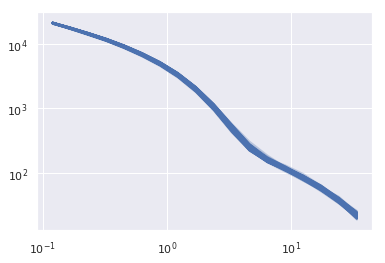

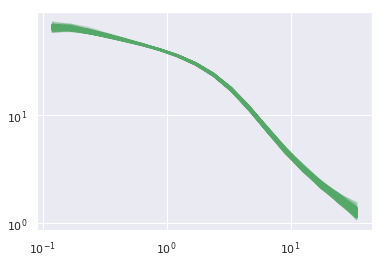

In [101]:
hod_idx = 4
plt.plot(rp_points, (all_outputs[:,hod_idx, :18]).T, alpha = 0.3, color = 'b')
plt.loglog();
plt.show();
plt.plot(rp_points, (all_outputs[:,hod_idx, 18:36]).T, alpha = 0.3, color = 'g')
plt.loglog();
plt.show();
#plt.plot(cic_points, all_outputs[idx, 36:])
#plt.loglog();
#plt.show();

In [102]:
mean = all_outputs.mean(axis = 0)

In [117]:
R =(all_outputs - mean)

cov = np.zeros((R.shape[2], R.shape[2]))
for i in xrange(R.shape[1]):
    cov+= R[:,i].T.dot(R[:,i])/(N-1)
    
cov/=R.shape[1]

In [118]:
cov.shape

(51, 51)

In [119]:
np.min(cov)

-59.454003281141446

In [120]:
im_cov = np.log10(cov)#np.log10(cov - np.min(cov) + 1)

/share/software/user/open/py-scipystack/1.0_py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [121]:
import matplotlib.colors as colors

In [ ]:
im = plt.imshow(im_cov, vmin = 0)#, norm=colors.LogNorm(vmin=im_cov.min(), vmax=im_cov.max()))
plt.colorbar(im);

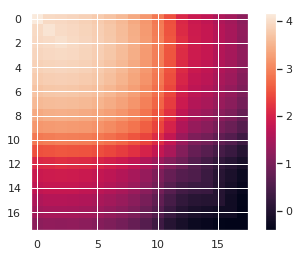

In [124]:
im = plt.imshow(im_cov[:18, :18])
plt.colorbar(im)

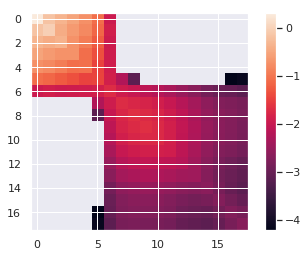

In [125]:
im = plt.imshow(im_cov[18:36, 18:36])
plt.colorbar(im);

In [129]:
print rp_points[:6], rp_points[6:]

[ 0.11972916  0.16697228  0.23285675  0.32473812  0.45287435  0.63157098] [  0.88077831   1.22831868   1.71299265   2.38891086   3.33153507
   4.646103     6.47937742   9.03603121  12.60149776  17.5738377
  24.50817968  34.17869685]


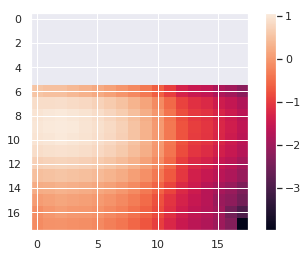

In [127]:
im = plt.imshow(im_cov[18:36, :18])
plt.colorbar(im);

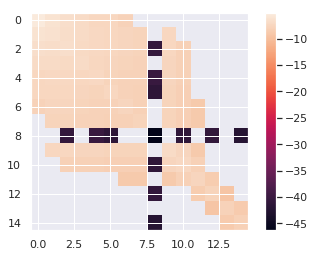

In [126]:
im = plt.imshow(im_cov[36:, 36:])
plt.colorbar(im);

/share/software/user/open/py-jupyter/1.0.0_py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


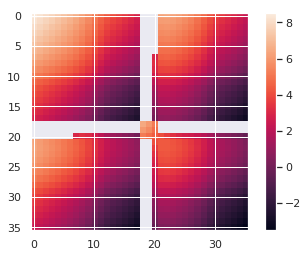

In [63]:
im = plt.imshow(np.log10(cov))#, norm=colors.LogNorm(vmin = min(np.min(cov), 0.0), vmax = np.max(cov)))
plt.colorbar(im);

In [64]:
r_bins = np.logspace(-1.1, 1.6, 19)
rpoints = (r_bins[1:]+r_bins[:-1])/2.0

[]

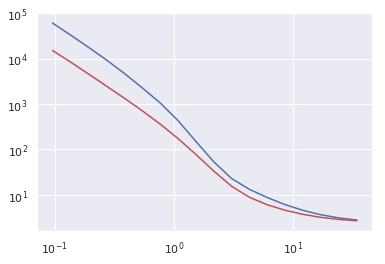

In [65]:
plt.plot(rpoints, all_outputs[0, :18].T, color = 'b')
plt.plot(rpoints, all_outputs[0, 18:].T, color = 'r')

plt.loglog()

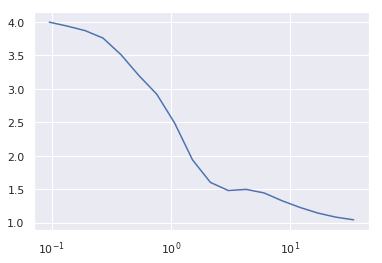

In [66]:
plt.plot(rpoints, all_outputs[0, :18].T/all_outputs[0, 18:].T, color = 'b')
#plt.plot(rpoints, all_outputs[0, 18:].T, color = 'r', alpha = 0.3)

#plt.loglog()
plt.xscale('log')